You have a portfolio composed 50% by Apple Inc. (AAPL) and 50% by Microsoft Corp (MSFT). And you want to analyze your  portfolio’s  returns.

 Img1

- Write a Python program to download the historical data of Apple Inc. (AAPL) and Microsoft Corp (MSFT) for the last 3 years.
- Calculate the daily return for AAPL and MSFT and present a comparative graphical analysis.
- Calculate and graphically represent the expected return for each of the stocks. To do this, we have to calculate the average of the daily returns of the period being analyzed and then annualize
- Calculate the Standard Deviation of the portfolio. The used stocks on the portfolio are correlated, so remember to use the appropriate Variance formula (reference the PDF for that formula if needed).
- The United States Treasury Bonds are known as risk free because they always pay. For this analysis, a 5-year bond will be considered with an annual rate of 1.72%.  How does the return profile of the current portfolio compare to one that is consisting solely of Treasury Bonds?
- How does the Risk Profile of the two compare?  Use Python to print a comparative analysis of the two portfolio in terms of all the major KPIs taught in this course.

In [69]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2017, 6, 1)

data = data.DataReader(['AAPL','MSFT'],  'google', start, end)
data =data['Open']
data.head()

,AAPL,MSFT
Date,,
2014-06-02,90.57,40.95
2014-06-03,89.78,40.60
2014-06-04,91.06,40.21
2014-06-05,92.31,40.59
2014-06-06,92.84,41.48


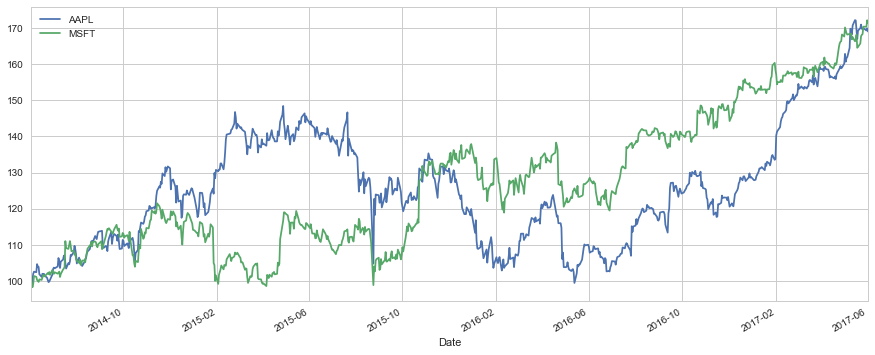

In [70]:
data.iloc[0] #normalize data before plot
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()
##plt.figure(figsize=(15,5));
##plt.plot(data.index,data);
##plt.legend(data.columns.values,loc=3);
##plt.title("prices");

In [71]:
#change to daily returns
data2 = pd.DataFrame()
tickers = ['AAPL', 'MSFT']

for tick in tickers:
    data2[tick+' Return'] = data[tick].pct_change()
data2.head()

,AAPL Return,MSFT Return
Date,,
2014-06-02,NaN,NaN
2014-06-03,-0.008723,-0.008547
2014-06-04,0.014257,-0.009606
2014-06-05,0.013727,0.009450
2014-06-06,0.005742,0.021927


In [72]:
 #calculate the average of the daily returns of the period being analyzed and then annualize
data2.describe()

C:\Users\alexb\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,AAPL Return,MSFT Return
count,756.000000,756.000000
mean,0.000839,0.000820
std,0.016970,0.014586
min,-0.140904,-0.107064
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,0.171182,0.100358


In [73]:
weights = np.array([0.50, 0.50]) #weight of security in portfolio
annual_returns = data2.mean() * 250
annual_returns # annual returns of each of the stocks and then calculate the dot product of these returns and the weights

AAPL Return    0.209706
MSFT Return    0.205111
dtype: float64

**Portfolios Expected Returns**

In [74]:
np.dot(annual_returns, weights)
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print(pfolio_1) #portoflio expected returns

20.741 %


In [75]:
data2.std() * 250 ** 0.5 #standev of returns

AAPL Return    0.268321
MSFT Return    0.230619
dtype: float64

In [76]:
cov_matrix = data2.cov()
cov_matrix

,AAPL Return,MSFT Return
AAPL Return,0.000288,0.000119
MSFT Return,0.000119,0.000213


In [77]:
cov_matrix_a = data2.cov() * 250
cov_matrix_a

,AAPL Return,MSFT Return
AAPL Return,0.071996,0.029703
MSFT Return,0.029703,0.053185


In [78]:
corr_matrix = data2.corr()
corr_matrix

,AAPL Return,MSFT Return
AAPL Return,1.00000,0.48001
MSFT Return,0.48001,1.00000


**Portfolio Variance**

In [79]:
pfolio_var = np.dot(weights.T, np.dot(data2.cov() * 250, weights))
pfolio_var

0.046146747405643104

**Portfolio Volatility**

In [80]:
pfolio_vol = (np.dot(weights.T, np.dot(data2.cov() * 250, weights))) ** 0.5
pfolio_vol

0.21481794013918648

In [81]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

21.482 %


The United States Treasury Bonds are known as risk free because they always pay. For this analysis, a 5-year bond will be considered with an annual rate of 1.72%. How does the return profile of the current portfolio compare to one that is consisting solely of Treasury Bonds?
How does the Risk Profile of the two compare? Use Python to print a comparative analysis of the two portfolio in terms of all the major KPIs taught in this course.

**Calculating the Expected Return of a Portfolio (CAPM)**

In [82]:
import pandas as pd
from pandas_datareader import data, wb
start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2017, 6, 1)

data3 = data.DataReader(['AAPL','MSFT','SPY'],  'google', start, end)
data3 =data3['Open']


In [83]:
data3 = data3.pct_change(periods=1)
data3.head()

,AAPL,MSFT,SPY
Date,,,
2014-06-02,NaN,NaN,NaN
2014-06-03,-0.008723,-0.008547,-0.002850
2014-06-04,0.014257,-0.009606,0.000364
2014-06-05,0.013727,0.009450,0.004884
2014-06-06,0.005742,0.021927,0.007549


In [84]:
data3['PortRet'] = data3['AAPL'] + data3['MSFT']
data3 = data3[['SPY','PortRet']]
data3.head()

,SPY,PortRet
Date,,
2014-06-02,NaN,NaN
2014-06-03,-0.002850,-0.017270
2014-06-04,0.000364,0.004651
2014-06-05,0.004884,0.023178
2014-06-06,0.007549,0.027668


In [85]:
cov = data3.cov() * 250
cov_with_market = cov.iloc[1,0]
market_var = data3['SPY'].var() * 250

port_beta = cov_with_market / market_var

Assume a risk-free rate of 1.72% and a risk premium of 5%. 
Estimate the expected return of Portfolio.

In [86]:
port_er = 0.025 + port_beta * 0.05
port_er = str(port_er * 100) + ' %'
print(port_er)

15.1991151519 %


**How does the return profile of the current portfolio compare to one that is consisting solely of Treasury Bonds? How does the Risk Profile of the two compare?**

In [87]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from pandas_datareader import data, wb
start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2017, 6, 1)

data4 = data.DataReader(['AAPL','MSFT','IEF'],  'google', start, end)
data4 =data4['Open']
data4 = data4.pct_change(periods=1)
data4['PortRet'] = data4['AAPL'] + data4['MSFT']
data4 = data4[['IEF','PortRet']]
data4.head()

,IEF,PortRet
Date,,
2014-06-02,NaN,NaN
2014-06-03,-0.003381,-0.017270
2014-06-04,-0.002617,0.004651
2014-06-05,-0.002235,0.023178
2014-06-06,0.004090,0.027668


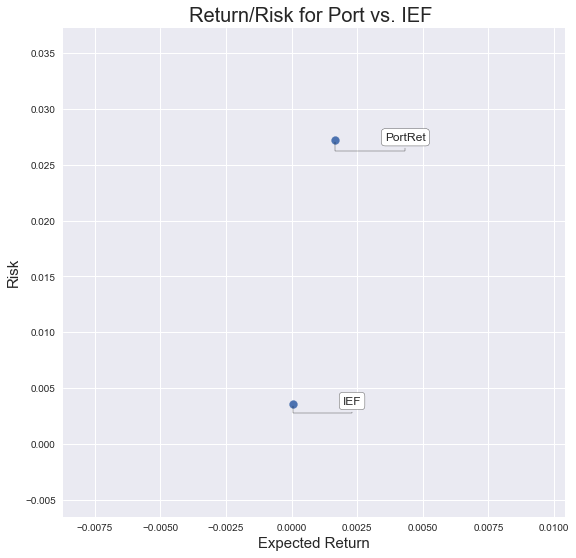

In [88]:
rets = data4.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(9,9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return/Risk for Port vs. IEF ", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

C:\Users\alexb\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


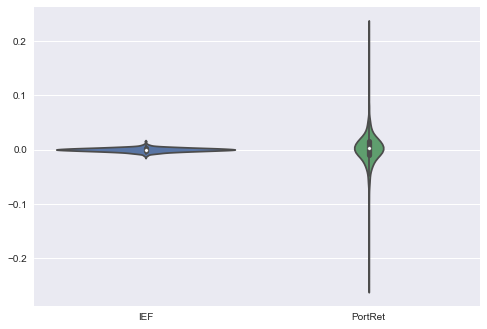

In [89]:
dataset1 = data4['IEF'] 
dataset2 = data4['PortRet']
rets = data4.dropna()
sns.violinplot(rets)
#plt.hist(dataset1, normed=True,color='indianred',alpha=0.5,bins=20)
#plt.hist(dataset2, normed=True,alpha=0.5,bins=20)

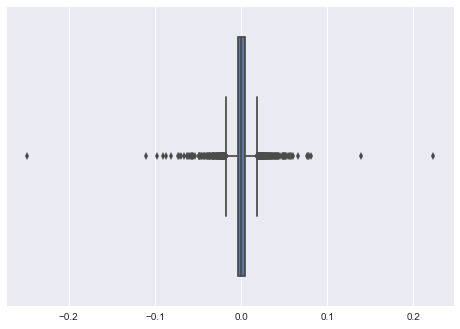

In [90]:
sns.boxplot([dataset1, dataset2])

In [91]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from pandas_datareader import data, wb
start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2017, 6, 1)

data4 = data.DataReader(['AAPL','MSFT','IEF'],  'google', start, end)
data4 = data4['Open']
data4['PortRet'] = data4['AAPL'] + data4['MSFT']
data4 = data4[['IEF','PortRet']]
data4.head()

,IEF,PortRet
Date,,
2014-06-02,103.53,131.52
2014-06-03,103.18,130.38
2014-06-04,102.91,131.27
2014-06-05,102.68,132.90
2014-06-06,103.10,134.32


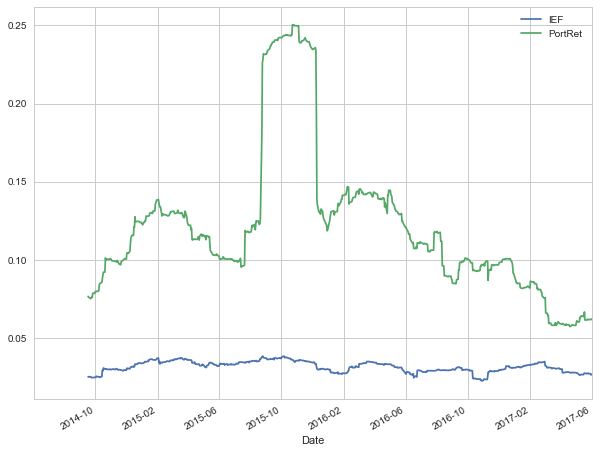

In [92]:
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = data4.pct_change()

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
# We are going to use a trailing 252 trading day window
window = 252
plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\alexb\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


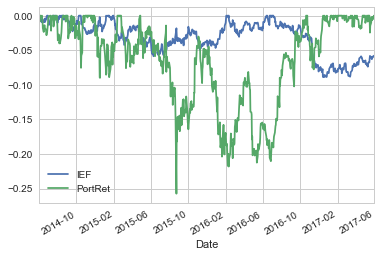

In [93]:
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt

import ffn

%pylab inline
# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = data4.rolling(min_periods=1,window=252,center=False).max()
Daily_Drawdown = data4/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = data4.rolling(min_periods=1,window=252,center=False).min()

# Plot the results
Daily_Drawdown.plot()
pp.show()

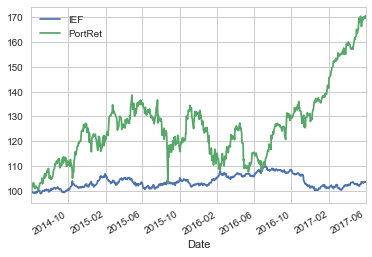

In [94]:
ax = data4.rebase().plot()

In [95]:
# ok now what about some performance metrics?
stats = data4.calc_stats()
stats.display()

Stat                 IEF         PortRet
-------------------  ----------  ----------
Start                2014-06-02  2014-06-02
End                  2017-06-01  2017-06-01
Risk-free rate       0.00%       0.00%

Total Return         3.29%       69.87%
Daily Sharpe         0.22        0.89
Daily Sortino        0.33        1.12
CAGR                 1.09%       19.33%
Max Drawdown         -8.90%      -25.75%
Calmar Ratio         0.12        0.75

MTD                  -0.26%      -0.49%
3m                   2.13%       10.59%
6m                   2.22%       31.06%
YTD                  2.28%       24.39%
1Y                   -2.65%      47.50%
3Y (ann.)            1.09%       19.33%
5Y (ann.)            1.09%       19.33%
10Y (ann.)           1.09%       19.33%
Since Incep. (ann.)  1.09%       19.33%

Daily Sharpe         0.22        0.89
Daily Sortino        0.33        1.12
Daily Mean (ann.)    1.24%       20.30%
Daily Vol (ann.)     5.69%       22.94%
Daily Skew           -0.03       -

In [96]:
data4 = data4.pct_change(periods=1)
data4 = data4.dropna()
data4.head()

,IEF,PortRet
Date,,
2014-06-03,-0.003381,-0.008668
2014-06-04,-0.002617,0.006826
2014-06-05,-0.002235,0.012417
2014-06-06,0.004090,0.010685
2014-06-09,-0.003977,-0.001712


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data4.describe()

,IEF,PortRet
count,756.000000,756.000000
mean,0.000049,0.000806
std,0.003583,0.014448
min,-0.013650,-0.131060
25%,-0.002011,-0.005530
50%,0.000097,0.001213
75%,0.002302,0.008123
max,0.015530,0.135604


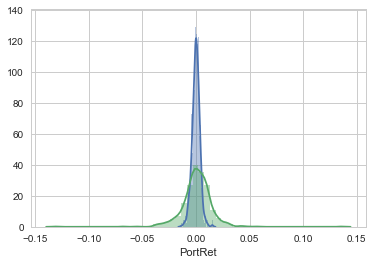

In [98]:
sns.distplot(data4['IEF'],bins=50)
sns.distplot(data4['PortRet'],bins=50)
#sns.pairplot(data4)

In [99]:
#States that at a 95% confidence interval our worst daily loss would not exeed -0.6% based off the past
#Value at Risk using Bootstrap Method = -0.6%
data4['IEF'].quantile(0.05)


-0.0060672629048543203

In [100]:
#States that at a 95% confidence interval our worst daily loss would not exeed -2.10% based off the past
#Value at Risk using Bootstrap Method = -2.10%
data4['PortRet'].quantile(0.05)


-0.021052169358347972

In [101]:
import pandas as pd
from pandas_datareader import data, wb
start = datetime.datetime(2014, 6, 1)
end = datetime.datetime(2017, 6, 1)

data5 = data.DataReader(['AAPL','MSFT','IEF'],  'google', start, end)
data5 =data5['Open']
#data4 = data4.pct_change(periods=1)
data5['PortRet'] = data5['AAPL'] + data5['MSFT']
data5 = data5[['IEF','PortRet']]
data5.head()

,IEF,PortRet
Date,,
2014-06-02,103.53,131.52
2014-06-03,103.18,130.38
2014-06-04,102.91,131.27
2014-06-05,102.68,132.90
2014-06-06,103.10,134.32


In [103]:
daily_return=data5.pct_change()
daily_return.head()

,IEF,PortRet
Date,,
2014-06-02,NaN,NaN
2014-06-03,-0.003381,-0.008668
2014-06-04,-0.002617,0.006826
2014-06-05,-0.002235,0.012417
2014-06-06,0.004090,0.010685


In [104]:
#Monte Carol Model for IEF

days=365
delta = 1/days
mu=daily_return['IEF'].mean()
sigma=daily_return['IEF'].std()

In [111]:
def monte_carlo (start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range (1,days):
        shock[x]=np.random.normal(loc=mu*delta,scale=sigma*np.sqrt(delta))
        drift[x]=mu*delta
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

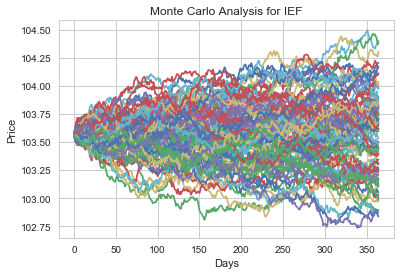

In [113]:
start_price=103.57

for run in range(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for IEF')

In [117]:
runs=10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]

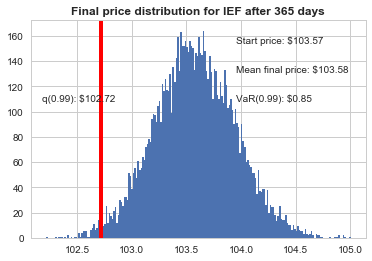

In [118]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for IEF after %s days" % days, weight='bold');

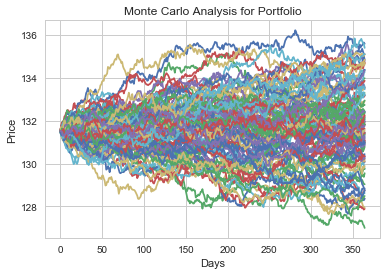

In [120]:
#Monte Carol Model for Portfolio

days=365
delta = 1/days
mu=daily_return['PortRet'].mean()
sigma=daily_return['PortRet'].std()

########

def monte_carlo (start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range (1,days):
        shock[x]=np.random.normal(loc=mu*delta,scale=sigma*np.sqrt(delta))
        drift[x]=mu*delta
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price
##########
start_price=131.52

for run in range(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Portfolio')

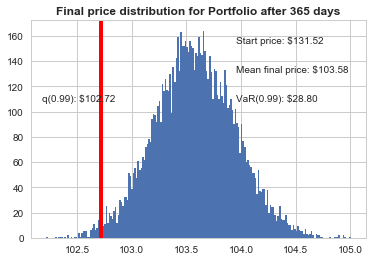

In [121]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Portfolio after %s days" % days, weight='bold');

**How Does the Risk Profile of the two compare?**

the risk of the portfolio is significatly larger than the risk of the 5 yr Treasury Bond